### [개인정보 수집 유효기간](https://school.programmers.co.kr/learn/courses/30/lessons/150370)

- 이전에 풀었던 코드

In [ ]:
def solution(today, terms, privacies):
    terms = {x.split()[0]:x.split()[1] for x in terms}
    today = 12*int(today.split('.')[0]) + int(today.split('.')[1]) + int(today.split('.')[2]) / 28
    
    answer = []
    for i, privacy in enumerate(privacies):
        period, contract = privacy.split()
        period = 12*int(period.split('.')[0]) + int(period.split('.')[1]) + int(period.split('.')[2]) / 28
        
        duration = today - period
        if duration >= int(terms[contract]):
            answer.append(i+1)
        
    return answer

- 특별히 수정할 곳은 없으나, 논리가 좀 더 뚜렷하게 보이게 수정(성능은 떨어짐)

In [ ]:
def solution(today, terms, privacies):
    terms = {x.split()[0]:int(x.split()[1]) for x in terms}
    today = 12*int(today.split('.')[0]) + int(today.split('.')[1]) + int(today.split('.')[2]) / 28
    
    privacies = [privacy.split() for privacy in privacies]
    privacies = {idx+1:[contract, list(map(int, privacy.split('.')))] for idx, (privacy, contract) in enumerate(privacies)}
    
    answer = []
    for idx, (contract, privacy) in privacies.items():
        period = 12*int(privacy[0]) \
                + int(privacy[1]) \
                + int(terms[contract]) \
                + int(privacy[2]) / 28 \
                - today
        if period <= 0: # 남은 기간이 없다면
            answer.append(idx)        
        
    return answer

### [공원 산책](https://school.programmers.co.kr/learn/courses/30/lessons/172928)

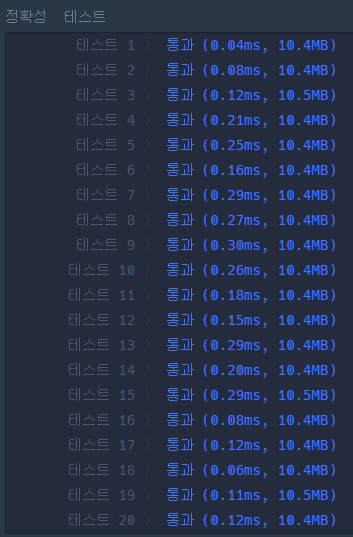

- 이전 코드

In [3]:
def solution(park, routes):    
    cur_x, cur_y = [(idx, x.index('S')) for idx, x in enumerate(park) if 'S' in x][0] # 현재 위치
    height, width = len(park), len(park[0])
    
    directions = {'E':(0,1), 'W':(0,-1), 'S':(1,0), 'N':(-1,0)}
    for route in routes:
        op, n = route.split()
        dx, dy = directions[op]
        nexts = [(cur_x+i*dx, cur_y+i*dy) for i in range(1, int(n)+1)]
        filtered = [x for x in nexts if 0 <= x[0] < height and 0 <= x[1] < width]
        if all(filtered != 'X'):
            cur_x, cur_y = nexts[-1][0], nexts[-1][1]
                
    return [cur_x, cur_y]

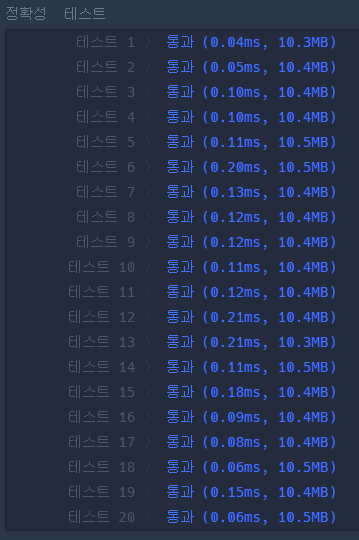

- 가독성을 조금 높이고, 조건문을 처리하는 과정을 간소화해 조금 더 최적화

In [6]:
def solution(park, routes):    
    cx, cy = [(idx, x.index('S')) for idx, x in enumerate(park) if 'S' in x][0] # 현재 위치
    height, width = len(park), len(park[0])
    
    directions = {'E':(0,1), 'W':(0,-1), 'S':(1,0), 'N':(-1,0)}
    for route in routes:
        op, n = route.split()
        dx, dy = directions[op]
        nexts = [(cx+i*dx, cy+i*dy) for i in range(1, int(n)+1)]
        last = nexts[-1]
        if 0 <= last[0] < height and 0 <= last[1] < width and not any([(x, y) for (x,y) in nexts if park[x][y] == 'X']):            
            (cx, cy) = last
                
    return [cx, cy]

True

### [신고 결과 받기](https://school.programmers.co.kr/learn/courses/30/lessons/92334)

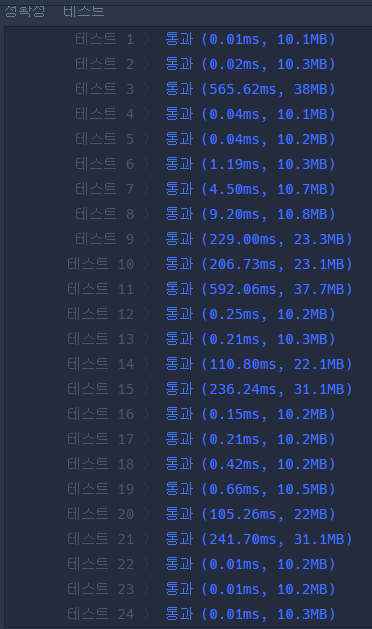

- 이전 코드

In [ ]:
def solution(id_list, report, k):
    report_list = {x:[0, []] for x in id_list} # user name : cnt, [user를 신고한 사람들]
    for r in report :
        a, b = r.split() # 신고한 사람, 신고당한 사람
        if a not in report_list[b][1]:
            report_list[b][0] += 1
            report_list[b][1].append(a)
    
    answer = {x:0 for x in id_list}
    for ids in id_list:
        if report_list[ids][0] >= k:
            report_names = report_list[ids][1]
            for name in report_names:
                answer[name] += 1

    return list(answer.values())

- default dict와 set 등을 활용해 코드를 간소화하고, 이를 통해 성능 개선

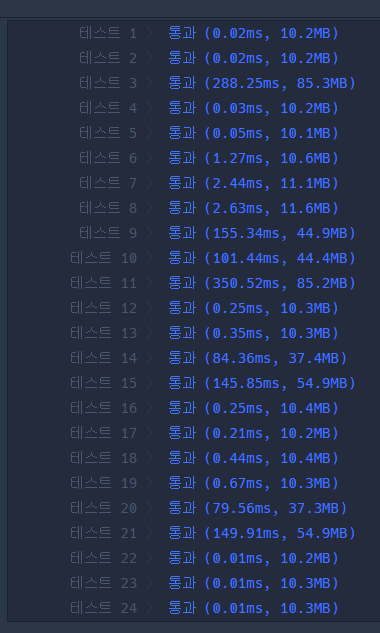

In [ ]:
from collections import defaultdict

def solution(id_list, report, k):
    report = [x.split() for x in set(report)]   
    result = defaultdict(list)
    for a, b in report:
        result[b].append(a)
        
    answer = {name:0 for name in id_list}
    for name, reporters in result.items():
        if len(reporters) >= k:
            for reporter in reporters:
                answer[reporter] += 1
    return list(answer.values())